In [70]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import figure
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon
import shapefile as shp
from pyproj import CRS

%matplotlib inline

In [26]:
with open("/Users/olivianystrom/Desktop/Springboard/CA_Birds_of_Prey/Birds_of_Prey.csv") as csv_file:
    df = pd.read_csv(csv_file)
    print(df["COMMON NAME"].unique())
    print(len(df["COMMON NAME"].unique()))
    print(df.head())

['Bald Eagle' "Cooper's Hawk" 'Osprey' 'Red-tailed Hawk'
 'American Kestrel' 'White-tailed Kite' 'Sharp-shinned Hawk'
 'Northern Harrier' 'Peregrine Falcon' 'Great Horned Owl' 'Golden Eagle'
 "Sharp-shinned/Cooper's Hawk" 'Red-shouldered Hawk' 'Western Screech-Owl'
 'Barn Owl' 'Short-eared Owl' 'Burrowing Owl' 'Northern Goshawk'
 'Prairie Falcon' 'Ferruginous Hawk' 'Northern Saw-whet Owl'
 'Long-eared Owl' "Swainson's Hawk" 'Broad-winged Hawk'
 'Northern Pygmy-Owl' 'Merlin' 'Rough-legged Hawk' 'Zone-tailed Hawk'
 'Snowy Owl' 'Flammulated Owl' 'Barred Owl' "Harris's Hawk"
 'Mississippi Kite' 'owl sp.' 'hawk sp.' 'falcon sp.' 'Common Black Hawk'
 'eagle sp.' 'Golden/Bald Eagle' "Cooper's Hawk/Northern Goshawk"
 'large falcon sp.' 'Swallow-tailed Kite' 'Buteo/eagle sp.'
 'Eurasian Kestrel' 'small falcon sp.' 'Gray Hawk'
 'Long-eared/Short-eared Owl'
 'Common Black x Red-shouldered Hawk (hybrid)'
 'Spotted x Barred Owl (hybrid)' 'Elf Owl'
 'Peregrine x Prairie Falcon (hybrid)'
 'Red-tailed

In [40]:
# print(df['COMMON NAME'].value_counts())
for name in list(df['COMMON NAME'].unique()):
    print(df["COMMON NAME" == name].value_counts())
#     if df[name].value_counts() < 10:
#         df.drop(df[df[name]], inplace = True)
# print(df['COMMON NAME'].unique())



KeyError: False

In [32]:
# df['Family'] = pd.NaT

# consider sorting by family/order

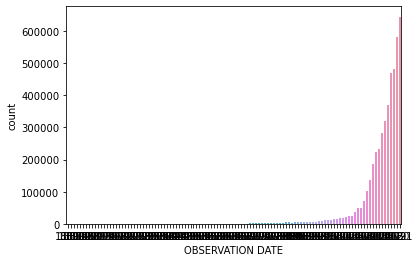

In [8]:
# Show total sightings over time
# Truncate date to year
# https://www.geeksforgeeks.org/creating-a-time-series-plot-with-seaborn-and-pandas/

df.index = pd.to_datetime(df['OBSERVATION DATE'],yearfirst=True)
df.groupby(by=[df.index.month, df.index.year])
# print(df.head())


# ax = sns.countplot(x=pd.DatetimeIndex(df['OBSERVATION DATE']).year, data=df)
# plt.xticks(rotation = 90)
# plt.figure(figsize = (250,100))
# plt.show()

sns.countplot(data = df, x=pd.DatetimeIndex(df['OBSERVATION DATE']).year)
plt.show()
# df.groupby(by = 'OBSERVATION DATE')
# sns.histplot(x = df['OBSERVATION DATE'], stat = 'count')
# plt.show()

,Unnamed: 0,Unnamed: 0.1,LAST EDITED DATE,COMMON NAME,SCIENTIFIC NAME,COUNTY,COUNTY CODE,LATITUDE,LONGITUDE,OBSERVATION DATE,geometry
0,0,14,2021-08-05 02:45:57.629774,Bald Eagle,Haliaeetus leucocephalus,Del Norte,US-CA-015,41.754666,-124.202714,1999-01-18,POINT (-124.20271 41.75467)
1,1,15,2021-04-01 02:35:26.368505,Cooper's Hawk,Accipiter cooperii,Riverside,US-CA-065,33.531253,-117.075205,1996-10-13,POINT (-117.07520 33.53125)
2,2,47,2017-08-16 00:15:16,Osprey,Pandion haliaetus,Placer,US-CA-061,38.936017,-121.330532,1983-10-30,POINT (-121.33053 38.93602)
3,3,59,2021-04-01 02:35:26.368505,Red-tailed Hawk,Buteo jamaicensis,Riverside,US-CA-065,33.462797,-115.980082,1997-08-22,POINT (-115.98008 33.46280)
4,4,66,2017-08-16 00:55:22,American Kestrel,Falco sparverius,Kern,US-CA-029,35.615712,-118.251686,1995-09-11,POINT (-118.25169 35.61571)


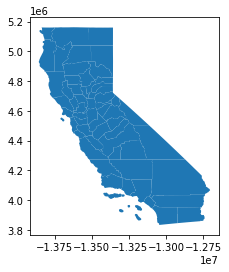

In [82]:
#Starting the Lat/Long plotting

CA_counties = gpd.read_file("/Users/olivianystrom/Desktop/Springboard/CA_Birds_of_Prey/CA_Counties/CA_Counties_TIGER2016.shp")
CA_counties.plot()

geometry = [Point(xy) for xy in zip( df["LONGITUDE"], df["LATITUDE"])]
geometry[:3]
# crs = CRS("EPSG:4326 ")
crs = CRS("WGS84")

geo_df = gpd.GeoDataFrame(df, crs = crs, geometry = geometry)
geo_df.head()

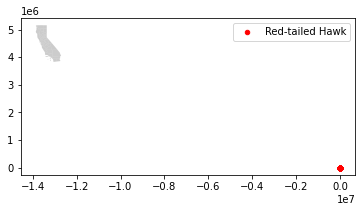

In [83]:
fig,ax = plt.subplots()
CA_counties.plot(ax = ax, alpha = 0.4, color = "grey")
geo_df[geo_df["COMMON NAME"] == "Red-tailed Hawk"].plot(ax = ax, 
                                                        markersize = 20, color = 'red', 
                                                        marker = 'o', label = "Red-tailed Hawk")
                                                  
plt.legend()